In [29]:
import numpy as np

In [30]:
n=10
np.random.randint(1,n+1,size=n)

array([4, 6, 8, 6, 5, 4, 9, 1, 9, 7])

In [31]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = 10
criterion = 'gini'
depth = None
min_samples_split = 2
min_samples_leaf = 1
max_features = 'auto'
bootstrap = True

In [32]:
import pandas as pd

In [33]:
import matplotlib.pyplot as plt

In [34]:
from sklearn.cross_validation import train_test_split

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
df = pd.read_csv('/home/alex/IAD Sem/train.csv')

In [38]:
df.head(5)
y = df['Survived'].values
del df['Survived']
df['Age'].fillna(df['Age'].mean(),inplace=True)
feature_names=['Sex','Age','SibSp','Pclass','Parch','Fare']
df=df[feature_names]
df['Sex'] = (df["Sex"]=='male').astype(int)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df,y)

In [40]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
print('ROC_AUC:',roc_auc_score(y_test,tree.predict_proba(X_test)[:,1]))
print('Accuracy:',accuracy_score(y_test,tree.predict(X_test)))

ROC_AUC: 0.783059210526
Accuracy: 0.793721973094


In [41]:
tree_params = {'max_depth':np.arange(1,50),'criterion':['gini','entropy']}
gs_tree = GridSearchCV(DecisionTreeClassifier(),tree_params,scoring='roc_auc')
gs_tree.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [42]:
gs_tree.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [45]:
print('ROC-AUC for optimized tree',roc_auc_score(y_test,gs_tree.best_estimator_.predict_proba(X_test)[:,1]))

ROC-AUC for optimized tree 0.874506578947


In [49]:
gs_tree.cv_results_.keys()
score = np.array(gs_tree.cv_results_['mean_test_score'])
crit = np.array(gs_tree.cv_results_['param_criterion'])
depth = np.array(gs_tree.cv_results_['param_max_depth'])

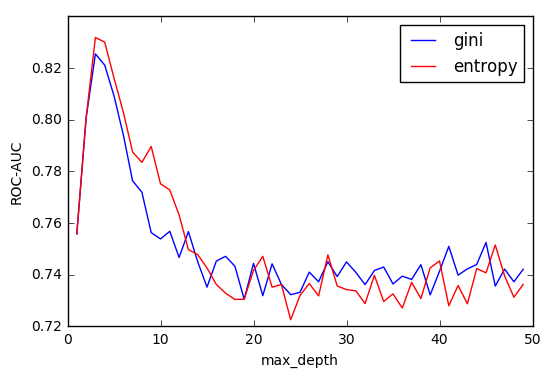

In [54]:
%matplotlib inline
idx = crit == 'gini'
plt.plot(depth[idx],score[idx],c='b')
idx = crit == 'entropy'
plt.plot(depth[idx],score[idx],c='r')
plt.legend(['gini','entropy'])
plt.xlabel('max_depth')
plt.ylabel('ROC-AUC')

Random forest for Titanic

n_jobs=-1

In [57]:
rf = RandomForestClassifier(n_estimators=400,n_jobs=-1)
rf.fit(X_train,y_train)
print('ROC_AUC:',roc_auc_score(y_test,rf.predict_proba(X_test)[:,1]))
print('Accuracy:',accuracy_score(y_test,rf.predict(X_test)))

ROC_AUC: 0.899671052632
Accuracy: 0.843049327354


In [58]:
rf.feature_importances_

array([ 0.2486956 ,  0.27632758,  0.05171088,  0.08403522,  0.03866924,
        0.30056148])

In [59]:
del X_train['Parch']
del X_test['Parch']
del X_train['SibSp']
del X_test['SibSp']

In [60]:
rf = RandomForestClassifier(n_estimators=400,n_jobs=-1)
rf.fit(X_train,y_train)
print('ROC_AUC:',roc_auc_score(y_test,rf.predict_proba(X_test)[:,1]))
print('Accuracy:',accuracy_score(y_test,rf.predict(X_test)))

ROC_AUC: 0.886184210526
Accuracy: 0.838565022422


In [61]:
rf.feature_importances_

array([ 0.25706927,  0.29614328,  0.09739976,  0.34938769])

In [62]:
rf = RandomForestClassifier(n_estimators=400,n_jobs=-1,oob_score=True)
rf.fit(X_train,y_train)
print('ROC_AUC:',roc_auc_score(y_test,rf.predict_proba(X_test)[:,1]))
print('Accuracy:',accuracy_score(y_test,rf.predict(X_test)))

ROC_AUC: 0.885526315789
Accuracy: 0.825112107623


In [63]:
rf.oob_score_

0.81886227544910184